<a href="https://colab.research.google.com/github/enigma6174/tensorflow-learn/blob/develop/regression/introduction_to_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression With Neural Networks

**Regression** is set of statistical processes for estimating the relationships between a dependent variable and one or more independent variables. The most common form of regression is **linear regression** which basically means to find a line that most closely fits the data according to a specific mathematical equation. 

In [286]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [11]:
# create the trai data
X_train = np.random.randint(0, 50, size=(20))
y_train = np.array([((x * 3) + 1) for x in X_train]) # y = 3x + 1

In [12]:
# create the test data
X_test = np.random.randint(0, 50, size=(5))
y_test = np.array([((x * 3) + 1) for x in X_test])

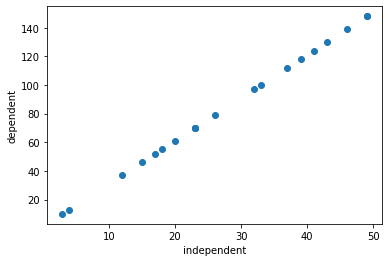

In [13]:
# plot the data
plt.scatter(X_train, y_train)
plt.xlabel('independent')
plt.ylabel('dependent')
plt.show()

In [14]:
# reshape the train data into tensors for neural networks
xt_train = tf.reshape(tf.constant(X_train), shape=[X_train.shape[0], 1])
yt_train = tf.reshape(tf.constant(y_train), shape=[y_train.shape[0], 1])

In [15]:
xt_train.shape, yt_train.shape

(TensorShape([20, 1]), TensorShape([20, 1]))

In [16]:
# reshape the test data into tensors for neural networks
xt_test = tf.reshape(tf.constant(X_test), shape=[X_test.shape[0], 1])
yt_test = tf.reshape(tf.constant(y_test), shape=[y_test.shape[0], 1])

In [17]:
xt_test.shape, yt_test.shape

(TensorShape([5, 1]), TensorShape([5, 1]))

## Steps In Creating A Neural Network Model

1. **Creating The Model:** Define the input and output layers as well as the hidden layers of the deep learning model. 

2. **Compile The Model:**
  - *Loss Function* tells the model how it is doing (ie. how wrong it is)
  - *Optimizer* tells us how to improve the parameters the model is learning
  - *Evaluation Metrics* tell us what we can use to interpret the performance of our model

3. **Fitting The Model:** Letting the model find patterns between **input features** and **output labels**. This phase is called as training a model

4. **Evaluating The Model:** How reliable are our model's predictions? 


In [18]:
# set the seed for reproducibility
tf.random.set_seed(42)

# create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# fit the model
model.fit(xt_train, yt_train, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 309ms/step - loss: 68.1878 - mae: 68.1878
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 60.5326 - mae: 60.5326
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 52.8774 - mae: 52.8774
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 45.2222 - mae: 45.2222
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 37.5669 - mae: 37.5669


In [19]:
x_pred = tf.constant([20, 5, 10, 11])

In [20]:
# use model for prediction - ideally prediction should be close to 3*x + 1
y_pred = model.predict(x_pred) # ideally the predictions should be close to [61, 16, 31, 34]
y_pred

1/1 [==============================] - 0s 86ms/step


array([[39.101196],
       [ 9.812799],
       [19.575598],
       [21.528158]], dtype=float32)

## Improving A Neural Network Model

1. **Creating The Model:** Add more layers to the model, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function etc.

2. **Compiling The Model:** Change the optimization function or perhaps the *learning rate* of the optimization function 

3. **Fitting The Model:** Train the model for more number of *epochs* or on more data (give it more examples to learn from)

In [21]:
# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# train the model - update for 100 epochs
model.fit(xt_train, yt_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 562ms/step - loss: 65.9533 - mae: 65.9533
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 58.2981 - mae: 58.2981
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 50.6429 - mae: 50.6429
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 42.9877 - mae: 42.9877
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 35.3324 - mae: 35.3324
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 27.6772 - mae: 27.6772
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 20.0220 - mae: 20.0220
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 12.3668 - mae: 12.3668
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 4.7115 - mae: 4.7115
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 3.0281 - mae: 3.0281
Epoch 11/100
1/1 [==============================] - 0s 6m

In [22]:
# predictions - predicted values should be closer to [61, 16, 31, 34]
y_pred = model.predict(x_pred)
y_pred

1/1 [==============================] - 0s 47ms/step


array([[60.383488 ],
       [15.1903715],
       [30.254744 ],
       [33.267616 ]], dtype=float32)

In [23]:
# create the model - add more layers with activation
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# compile the model - use adam optimizer
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(lr=0.1),
              metrics=['mae'])

# train the model - use 25 epochs
model.fit(xt_train, yt_train, epochs=25)

Epoch 1/25


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 493ms/step - loss: 76.2129 - mae: 76.2129
Epoch 2/25
1/1 [==============================] - 0s 10ms/step - loss: 40.6362 - mae: 40.6362
Epoch 3/25
1/1 [==============================] - 0s 14ms/step - loss: 6.9411 - mae: 6.9411
Epoch 4/25
1/1 [==============================] - 0s 9ms/step - loss: 3.8820 - mae: 3.8820
Epoch 5/25
1/1 [==============================] - 0s 10ms/step - loss: 16.5300 - mae: 16.5300
Epoch 6/25
1/1 [==============================] - 0s 8ms/step - loss: 17.5750 - mae: 17.5750
Epoch 7/25
1/1 [==============================] - 0s 8ms/step - loss: 7.4924 - mae: 7.4924
Epoch 8/25
1/1 [==============================] - 0s 7ms/step - loss: 12.6581 - mae: 12.6581
Epoch 9/25
1/1 [==============================] - 0s 10ms/step - loss: 17.7363 - mae: 17.7363
Epoch 10/25
1/1 [==============================] - 0s 11ms/step - loss: 10.6458 - mae: 10.6458
Epoch 11/25
1/1 [==============================] - 0s 8ms/step - loss: 4.2598 -

In [24]:
# predictions using the trained model
y_pred = model.predict(x_pred) # predicted values should be near [61, 16, 31, 34]
y_pred

1/1 [==============================] - 0s 55ms/step


array([[58.32923 ],
       [15.502793],
       [29.776628],
       [32.63189 ]], dtype=float32)

In [25]:
# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1)
])

# compile the model - use SGD optimizer
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# train the model - use 25 epochs
model.fit(xt_train, yt_train, epochs=25)

Epoch 1/25
1/1 [==============================] - 0s 362ms/step - loss: 85.8467 - mae: 85.8467
Epoch 2/25
1/1 [==============================] - 0s 12ms/step - loss: 82.7374 - mae: 82.7374
Epoch 3/25
1/1 [==============================] - 0s 14ms/step - loss: 79.8309 - mae: 79.8309
Epoch 4/25
1/1 [==============================] - 0s 11ms/step - loss: 75.6168 - mae: 75.6168
Epoch 5/25
1/1 [==============================] - 0s 10ms/step - loss: 67.8950 - mae: 67.8950
Epoch 6/25
1/1 [==============================] - 0s 9ms/step - loss: 51.4927 - mae: 51.4927
Epoch 7/25
1/1 [==============================] - 0s 9ms/step - loss: 10.8941 - mae: 10.8941
Epoch 8/25
1/1 [==============================] - 0s 9ms/step - loss: 112.8197 - mae: 112.8197
Epoch 9/25
1/1 [==============================] - 0s 10ms/step - loss: 64.7658 - mae: 64.7658
Epoch 10/25
1/1 [==============================] - 0s 9ms/step - loss: 45.9462 - mae: 45.9462
Epoch 11/25
1/1 [==============================] - 0s 7ms/st

In [26]:
# make predictions 
y_pred = model.predict(x_pred) # should be close to [61, 16, 31, 34]
y_pred

1/1 [==============================] - 0s 60ms/step


array([[14.0109215],
       [ 3.6537876],
       [ 7.1061654],
       [ 7.796642 ]], dtype=float32)

### Recap: Common Steps To Improve A Model

- Adding More Layers
- Increase The Number Of Hidden Units
- Change The Activation Function
- Change The Optimization Function
- Change The Learning Rate
- Train For More Epochs
- Use More Data

> Since all the above values can be altered by the user to modify the outcome of the neural network they are referred to as **hyperparameters**. The values that the neural network learns on it's own are called as **parameters** and these are not coded by the user

## Evaluating A Neural Network

Before evaluating a neural network model, it is a good idea to visualize a model. The following points can be considered for visualizing a model:  

- **Data:** What data are we working with? What does it look like?
- **Model:** What does our model look like?
- **Training:** How does the model perform when it learns?
- **Predictions:** How the predictions of our model line up against the ground truth?


### The Three-Set Principle
After loading the dataset and before getting started with the neural network model, the data needs to be split into 3 sets as mentioned:

- **Training Set:** The dataset used for training the model - typically covers around 70% of the total data available
- **Validation Set:** The model gets tuned on this data - typically covers around 15% of the total data available
- **Test Set:** The model gets evaluated on this data to test what and how well it has learned - typically covers around 15% of the total data available  

**Note**  
If the model automatically splits the train data into train and validation data internally, then all we need to do is split the original dataset as per the 80-20 ratio: 80% for training and 20% for testing.

In [62]:
# create the dataset
X = tf.range(-500, 500, 4)
y = 3 * X + 5

In [63]:
X.shape, y.shape

(TensorShape([250]), TensorShape([250]))

In [64]:
# create the train set (80%)
x_train = X[:200]
y_train = y[:200]

# create the test set (20%)
x_test = X[200:]
y_test = y[200:]

In [65]:
# reshape the train set for neural networks
x_train = tf.expand_dims(x_train, axis=-1)
y_train = tf.expand_dims(y_train, axis=-1)

x_train.shape, y_train.shape

(TensorShape([200, 1]), TensorShape([200, 1]))

In [66]:
# reshape the test set for neural networks
x_test = tf.expand_dims(x_test, axis=-1)
y_test = tf.expand_dims(y_test, axis=-1)

x_test.shape, y_test.shape

(TensorShape([50, 1]), TensorShape([50, 1]))

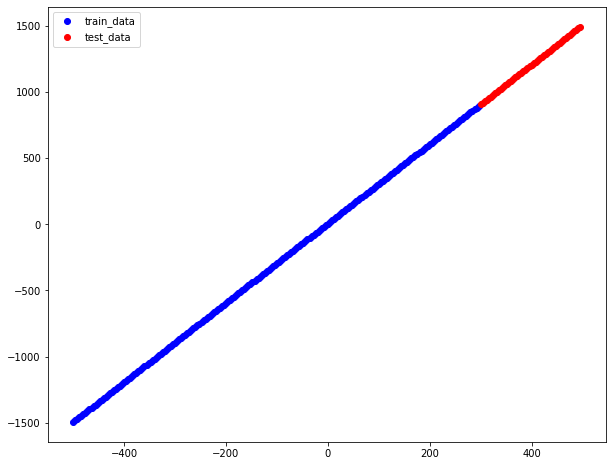

In [68]:
# plot the data
plt.figure(figsize=(10, 8))
plt.scatter(x_train, y_train, c='blue', label='train_data')
plt.scatter(x_test, y_test, c='red', label='test_data')
plt.legend()
plt.show()

### Visualizing The Neural Network Model

In [216]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1], activation='relu', name='hidden_1'),
    tf.keras.layers.Dense(1, input_shape=[100], name='output')
], name='practice_model_1')

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['mae'])

In [213]:
model.summary()

Model: "practice_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_1 (Dense)            (None, 100)               200       
                                                                 
 output (Dense)              (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


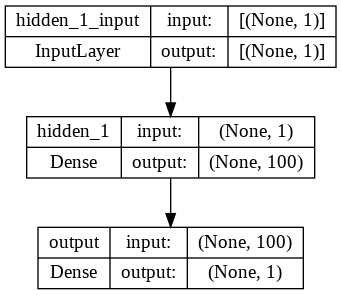

In [214]:
tf.keras.utils.plot_model(model=model, show_shapes=True)

In [217]:
model.fit(x_train, y_train, epochs=25)

Epoch 1/25
7/7 [==============================] - 0s 3ms/step - loss: 649.5697 - mae: 649.5697
Epoch 2/25
7/7 [==============================] - 0s 3ms/step - loss: 629.4219 - mae: 629.4219
Epoch 3/25
7/7 [==============================] - 0s 3ms/step - loss: 609.2116 - mae: 609.2116
Epoch 4/25
7/7 [==============================] - 0s 3ms/step - loss: 588.8792 - mae: 588.8792
Epoch 5/25
7/7 [==============================] - 0s 2ms/step - loss: 568.1895 - mae: 568.1895
Epoch 6/25
7/7 [==============================] - 0s 3ms/step - loss: 547.6375 - mae: 547.6375
Epoch 7/25
7/7 [==============================] - 0s 3ms/step - loss: 525.6747 - mae: 525.6747
Epoch 8/25
7/7 [==============================] - 0s 4ms/step - loss: 503.2773 - mae: 503.2773
Epoch 9/25
7/7 [==============================] - 0s 5ms/step - loss: 478.9355 - mae: 478.9355
Epoch 10/25
7/7 [==============================] - 0s 5ms/step - loss: 454.4638 - mae: 454.4638
Epoch 11/25
7/7 [==============================] 

### Visualizing The Model's Predictions

Plot the predictions against the ground truth labels to get a good idea of the model's predictions

In [218]:
# get the predictions
y_pred = model.predict(x_test)

2/2 [==============================] - 0s 6ms/step


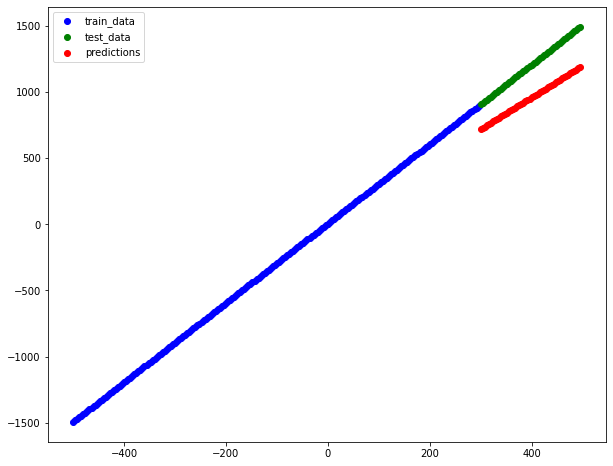

In [219]:
plt.figure(figsize=(10, 8))

# plot the training data
plt.scatter(x_train, y_train, c="blue", label="train_data")

# plot the testing data
plt.scatter(x_test, y_test, c="green", label="test_data")

# plot the predictions
plt.scatter(x_test, y_pred, c="red", label="predictions")

plt.legend()
plt.show()

### Evaluating The Model's Predictions With Metrics

Some of the most popular metrics for evaluating the predictions of a regression model are:

- **Mean Absolute Error (MAE):** Measure of the predictions errors on an average
- **Mean Squared Error (MSE):** Square of the mean of the errors
- **Huber:** - A combination of MAE and MSE and much less sensitive to outliers

In [220]:
# evaluate the model on the test set
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 245.5639 - mae: 245.5639


[245.56390380859375, 245.56390380859375]

In [249]:
# calculate the mae by hand
# need to remove the extra dimensions otherwise we will only get a tensor of absolute differences
tf.metrics.mean_absolute_error(tf.squeeze(y_test), np.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=245.5639>

In [250]:
# calculate the mse by hand
tf.metrics.mean_squared_error(tf.squeeze(y_test), np.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=61534.816>

## Comparing The Results Of Different Experiments

In [263]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
], "first_model")

model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model_1.fit(x_train, y_train, epochs=50)

Epoch 1/50
7/7 [==============================] - 1s 3ms/step - loss: 292.5819 - mae: 292.5819
Epoch 2/50
7/7 [==============================] - 0s 6ms/step - loss: 257.6765 - mae: 257.6765
Epoch 3/50
7/7 [==============================] - 0s 4ms/step - loss: 237.7995 - mae: 237.7995
Epoch 4/50
7/7 [==============================] - 0s 3ms/step - loss: 229.7576 - mae: 229.7576
Epoch 5/50
7/7 [==============================] - 0s 4ms/step - loss: 208.2012 - mae: 208.2012
Epoch 6/50
7/7 [==============================] - 0s 3ms/step - loss: 221.8671 - mae: 221.8671
Epoch 7/50
7/7 [==============================] - 0s 4ms/step - loss: 228.9819 - mae: 228.9819
Epoch 8/50
7/7 [==============================] - 0s 10ms/step - loss: 221.7848 - mae: 221.7848
Epoch 9/50
7/7 [==============================] - 0s 4ms/step - loss: 233.0079 - mae: 233.0079
Epoch 10/50
7/7 [==============================] - 0s 3ms/step - loss: 221.3228 - mae: 221.3228
Epoch 11/50
7/7 [==============================]

In [267]:
# evaluate the model
_, mae_1 = model_1.evaluate(x_test, y_test)
mae_1

2/2 [==============================] - 0s 7ms/step - loss: 373.8235 - mae: 373.8235


373.82354736328125

In [266]:
# get the predictions
yhat_1 = model_1.predict(x_test)

2/2 [==============================] - 0s 7ms/step


In [268]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], activation='relu'),
    tf.keras.layers.Dense(3, input_shape=[10], activation='relu'),
    tf.keras.layers.Dense(1, input_shape=[3])
], 'second_model')

model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(1e-2),
              metrics=['mae'])

model_2.fit(x_train, y_train, epochs=25)

Epoch 1/25
7/7 [==============================] - 0s 3ms/step - loss: 637.2764 - mae: 637.2764
Epoch 2/25
7/7 [==============================] - 0s 2ms/step - loss: 584.8748 - mae: 584.8748
Epoch 3/25
7/7 [==============================] - 0s 3ms/step - loss: 545.6316 - mae: 545.6316
Epoch 4/25
7/7 [==============================] - 0s 3ms/step - loss: 491.6005 - mae: 491.6005
Epoch 5/25
7/7 [==============================] - 0s 3ms/step - loss: 416.1142 - mae: 416.1142
Epoch 6/25
7/7 [==============================] - 0s 3ms/step - loss: 316.8138 - mae: 316.8138
Epoch 7/25
7/7 [==============================] - 0s 3ms/step - loss: 177.3956 - mae: 177.3956
Epoch 8/25
7/7 [==============================] - 0s 3ms/step - loss: 53.5369 - mae: 53.5369
Epoch 9/25
7/7 [==============================] - 0s 3ms/step - loss: 55.5738 - mae: 55.5738
Epoch 10/25
7/7 [==============================] - 0s 3ms/step - loss: 31.3512 - mae: 31.3512
Epoch 11/25
7/7 [==============================] - 0s 3

In [269]:
# evaluate the model
_, mae_2 = model_2.evaluate(x_test, y_test)
mae_2

2/2 [==============================] - 0s 8ms/step - loss: 0.7537 - mae: 0.7537


0.7536852955818176

In [270]:
# calculate the predictions
yhat_2 = model_2.predict(x_test)

2/2 [==============================] - 0s 7ms/step


In [273]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=[1], activation='relu'),
    tf.keras.layers.Dense(1)
], 'third_model')

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_3.fit(x_train, y_train, epochs=50)

Epoch 1/50
7/7 [==============================] - 0s 2ms/step - loss: 781.5139 - mae: 781.5139
Epoch 2/50
7/7 [==============================] - 0s 2ms/step - loss: 702.4202 - mae: 702.4202
Epoch 3/50
7/7 [==============================] - 0s 2ms/step - loss: 500.6060 - mae: 500.6060
Epoch 4/50
7/7 [==============================] - 0s 2ms/step - loss: 598.5281 - mae: 598.5281
Epoch 5/50
7/7 [==============================] - 0s 3ms/step - loss: 553.4388 - mae: 553.4388
Epoch 6/50
7/7 [==============================] - 0s 3ms/step - loss: 580.1119 - mae: 580.1119
Epoch 7/50
7/7 [==============================] - 0s 3ms/step - loss: 581.8093 - mae: 581.8093
Epoch 8/50
7/7 [==============================] - 0s 4ms/step - loss: 568.3437 - mae: 568.3437
Epoch 9/50
7/7 [==============================] - 0s 3ms/step - loss: 556.6159 - mae: 556.6159
Epoch 10/50
7/7 [==============================] - 0s 4ms/step - loss: 554.7073 - mae: 554.7073
Epoch 11/50
7/7 [==============================] 

In [274]:
# evaluate the model
_, mae_3 = model_3.evaluate(x_test, y_test)
mae_3

2/2 [==============================] - 0s 11ms/step - loss: 154.2794 - mae: 154.2794


154.27938842773438

In [275]:
# get the predictions
yhat_3 = model_3.predict(x_test)

2/2 [==============================] - 0s 9ms/step


In [282]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=[1], activation='relu'),
    tf.keras.layers.Dense(10, input_shape=[50], activation='relu'),
    tf.keras.layers.Dense(1)
], 'fourth_model')

model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
                metrics=['mae'])

model_4.fit(x_train, y_train, epochs=20)

Epoch 1/20
7/7 [==============================] - 1s 4ms/step - loss: 539.5998 - mae: 539.5998
Epoch 2/20
7/7 [==============================] - 0s 3ms/step - loss: 345.6013 - mae: 345.6013
Epoch 3/20
7/7 [==============================] - 0s 4ms/step - loss: 95.9543 - mae: 95.9543
Epoch 4/20
7/7 [==============================] - 0s 4ms/step - loss: 98.1368 - mae: 98.1368
Epoch 5/20
7/7 [==============================] - 0s 4ms/step - loss: 52.8226 - mae: 52.8226
Epoch 6/20
7/7 [==============================] - 0s 4ms/step - loss: 35.6476 - mae: 35.6476
Epoch 7/20
7/7 [==============================] - 0s 4ms/step - loss: 26.3314 - mae: 26.3314
Epoch 8/20
7/7 [==============================] - 0s 4ms/step - loss: 24.6561 - mae: 24.6561
Epoch 9/20
7/7 [==============================] - 0s 4ms/step - loss: 20.2337 - mae: 20.2337
Epoch 10/20
7/7 [==============================] - 0s 4ms/step - loss: 21.6059 - mae: 21.6059
Epoch 11/20
7/7 [==============================] - 0s 4ms/step - 

In [284]:
# evaluate the model
_, mae_4 = model_4.evaluate(x_test, y_test)
mae_4

2/2 [==============================] - 0s 6ms/step - loss: 17.9982 - mae: 17.9982


17.9981632232666

In [285]:
# calculate the predictions
yhat_4 = model_4.predict(x_test)

2/2 [==============================] - 0s 7ms/step


In [295]:
d = [
      [model_1.name, mae_1], 
      [model_2.name, mae_2],
      [model_3.name, mae_3], 
      [model_4.name, mae_4]
    ]
d

[['first_model', 373.82354736328125],
 ['second_model', 0.7536852955818176],
 ['third_model', 154.27938842773438],
 ['fourth_model', 17.9981632232666]]

In [296]:
df = pd.DataFrame(d, columns=['model_name', 'mean_absolute_error'])
df

,model_name,mean_absolute_error
0,first_model,373.823547
1,second_model,0.753685
2,third_model,154.279388
3,fourth_model,17.998163


## Saving And Loading Models

Saving a model allows us to use them outside the environment where they were trained

In [297]:
# save the model with tensorflow standard (saved_models format)
model_2.save("saved_models/regression_model")

In [298]:
# save the model with global HDF5 format
model_2.save('saved_models/regression_model_HDF5.h5')

In [299]:
# summarize the model
model_2.summary()

Model: "second_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 10)                20        
                                                                 
 dense_41 (Dense)            (None, 3)                 33        
                                                                 
 dense_42 (Dense)            (None, 1)                 4         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [302]:
# load the saved model
model = tf.keras.models.load_model("saved_models/regression_model")
model.summary()

Model: "second_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 10)                20        
                                                                 
 dense_41 (Dense)            (None, 3)                 33        
                                                                 
 dense_42 (Dense)            (None, 1)                 4         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [303]:
# make predictions with loaded models
yhat = model.predict(x_test)

2/2 [==============================] - 0s 7ms/step


In [304]:
# compare predictions of loaded model with predictions of model_2
yhat == yhat_2

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])